## Implementing K-Means Clustering Model 

Source: K-means Clustering From Scratch In Python [Machine Learning Tutorial] - DataQuest

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('../data/audio_cleaned.csv')

In [5]:
df.head()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
0,0,1.0,5.272727,1.004272,1.581922,1.002876,1.002856,1.005677,1.802017,1.160955,...,1.004750,4.485874,2.097500,4.209142,5.087070,9.981928,9.141117,4.055029,2.233992,10.0
1,1,1.0,3.272727,1.489975,1.884802,5.146641,1.009195,1.018088,1.441208,1.009562,...,1.015135,1.009166,1.009338,3.972378,6.827859,9.593373,1.000014,3.925185,3.369162,10.0
2,2,1.0,2.045455,1.034466,1.022792,1.023200,1.022938,1.044994,1.040968,2.514633,...,1.037649,1.022800,3.113880,5.106873,6.267595,8.563251,1.000000,4.166323,2.252010,10.0
3,3,1.0,3.409091,1.666690,1.011586,1.011764,1.011639,1.384053,1.020787,4.935399,...,2.224599,3.069476,1.011819,7.208155,7.699638,1.755411,2.800000,7.978153,7.693622,10.0
4,4,1.0,3.136364,1.014718,1.009766,4.906505,1.009804,1.019279,1.017510,5.431992,...,1.016132,1.628495,1.009956,3.607366,6.818399,9.783132,1.002220,6.373660,4.549379,10.0


In [6]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [64]:
# initialize random centroids 

# defining function random centroids that randomly iterates on each data point to find centroids

# Note: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead centroid = df.apply(lambda x: float(x.sample()))
def random_centroids(df,k):
    centroids = []
    for i in range (k):
        centroid = df.apply(lambda x: float(x.sample()))
        centroids.append(centroid) 
    return pd.concat(centroids, axis = 1)

In [65]:
centroids = random_centroids(df, 5)

centroids

/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_1306/3264488138.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = df.apply(lambda x: float(x.sample()))


,0,1,2,3,4
release_date,4.913043,2.695652,8.434783,8.695652,7.913043
len,4.000000,4.681818,3.318182,2.045455,4.772727
dating,1.004465,1.013378,1.030798,1.012586,2.299857
violence,1.041265,1.004002,4.725542,4.366875,1.018374
world/life,5.357022,1.004216,7.051423,7.176163,1.002107
night/time,1.022938,1.018484,1.929244,1.004379,4.753935
shake the audience,1.017534,1.036274,1.015562,1.022071,1.054397
family/gospel,3.423309,1.768635,2.247364,1.008197,2.239286
romantic,1.003905,1.005534,1.005401,1.512427,1.005272
communication,1.018182,2.293356,2.534999,1.916625,1.007064


In [66]:
# label each data point from how far each point is from centroid (cluster assignment)

def get_labels(df, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

labels = get_labels(df,centroids)

labels.value_counts()

1    9125
4    8765
0    5642
2    3746
3    1094
Name: count, dtype: int64

In [67]:
# update centroids with geometric mean of clusters 

def new_centroids(df, labels, k):
    centroids = df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

# repeat until centroids stop updating 

In [68]:
# plot cluster assignments at each iteration 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(df, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(df)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

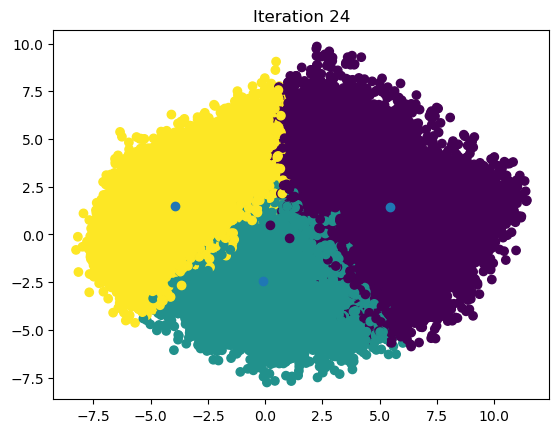

In [69]:
# producing graph that iterates up to 100/until centroids stop updating for 3 clusters 

max_iterations = 100
centroid_count = 3

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    plot_clusters(df, labels, centroids, iteration)
    iteration += 1

In [70]:
# interpret cluster assignment

centroids 

,0,1,2
release_date,3.864597,4.860969,8.507775
len,3.178496,3.940262,4.478299
dating,1.184630,1.223760,1.162647
violence,1.353316,1.657536,1.875605
world/life,1.804039,1.675870,1.640574
night/time,1.324875,1.376688,1.313371
shake the audience,1.124316,1.223777,1.257475
family/gospel,1.201045,1.198038,1.163009
romantic,1.514364,1.244474,1.174505
communication,1.668702,1.663135,1.665246


In [7]:
audio_df = pd.read_csv('../data/tcc_ceds_music.csv')

In [72]:
genres = audio_df['genre']

genres = pd.concat([genres, df], axis=1)

genres

,genre,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
0,pop,1.0,5.272727,1.004272,1.581922,1.002876,1.002856,1.005677,1.802017,1.160955,...,1.004750,4.485874,2.097500,4.209142,5.087070,9.981928,9.141117,4.055029,2.233992,10.0
1,pop,1.0,3.272727,1.489975,1.884802,5.146641,1.009195,1.018088,1.441208,1.009562,...,1.015135,1.009166,1.009338,3.972378,6.827859,9.593373,1.000014,3.925185,3.369162,10.0
2,pop,1.0,2.045455,1.034466,1.022792,1.023200,1.022938,1.044994,1.040968,2.514633,...,1.037649,1.022800,3.113880,5.106873,6.267595,8.563251,1.000000,4.166323,2.252010,10.0
3,pop,1.0,3.409091,1.666690,1.011586,1.011764,1.011639,1.384053,1.020787,4.935399,...,2.224599,3.069476,1.011819,7.208155,7.699638,1.755411,2.800000,7.978153,7.693622,10.0
4,pop,1.0,3.136364,1.014718,1.009766,4.906505,1.009804,1.019279,1.017510,5.431992,...,1.016132,1.628495,1.009956,3.607366,6.818399,9.783132,1.002220,6.373660,4.549379,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,hip hop,10.0,4.500000,1.014718,1.009766,1.009907,1.009804,1.019279,1.017510,1.010192,...,1.016132,1.599730,1.009956,9.052943,7.837397,1.562941,1.000000,7.764839,7.261176,1.0
28368,hip hop,10.0,4.000000,1.013803,1.009162,1.327948,1.009195,1.018088,1.016423,1.631952,...,1.613860,1.009166,1.009338,6.981256,8.106223,1.041464,1.000022,9.304411,8.180123,1.0
28369,hip hop,10.0,4.454545,1.016862,2.412293,2.578551,1.011230,1.714509,1.020057,1.336044,...,1.018468,1.011184,1.011404,6.991121,7.542727,1.939749,1.000010,8.543899,7.909845,1.0
28370,hip hop,10.0,4.000000,1.012586,1.008360,1.008472,1.008386,1.870248,1.014977,1.008724,...,2.069123,1.008363,1.008516,8.993752,8.081994,1.063242,1.004541,5.576051,8.972941,1.0


In [73]:
genres[labels ==0]

,genre,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
0,pop,1.000000,5.272727,1.004272,1.581922,1.002876,1.002856,1.005677,1.802017,1.160955,...,1.004750,4.485874,2.097500,4.209142,5.087070,9.981928,9.141117,4.055029,2.233992,10.000000
1,pop,1.000000,3.272727,1.489975,1.884802,5.146641,1.009195,1.018088,1.441208,1.009562,...,1.015135,1.009166,1.009338,3.972378,6.827859,9.593373,1.000014,3.925185,3.369162,10.000000
2,pop,1.000000,2.045455,1.034466,1.022792,1.023200,1.022938,1.044994,1.040968,2.514633,...,1.037649,1.022800,3.113880,5.106873,6.267595,8.563251,1.000000,4.166323,2.252010,10.000000
4,pop,1.000000,3.136364,1.014718,1.009766,4.906505,1.009804,1.019279,1.017510,5.431992,...,1.016132,1.628495,1.009956,3.607366,6.818399,9.783132,1.002220,6.373660,4.549379,10.000000
5,pop,1.000000,5.409091,1.010591,4.854930,1.007129,1.682253,1.013905,1.012607,1.007351,...,1.011635,2.174212,1.007168,7.227886,7.170295,9.087348,1.000000,7.913232,5.945819,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27343,rock,9.869565,3.500000,1.012586,1.008360,4.911154,1.008386,1.016503,1.627858,1.008724,...,1.013809,1.008363,1.008516,5.323907,6.822783,8.996987,1.032802,3.934460,3.792599,1.130435
27401,rock,10.000000,2.818182,1.022088,1.014627,1.014868,1.428897,1.028877,1.026265,1.015265,...,1.024163,6.228085,1.014934,5.708648,6.535959,9.584337,7.395939,2.385614,3.846655,1.000000
27409,rock,10.000000,2.000000,1.044735,5.437754,1.030112,1.029768,1.058366,1.053166,1.914724,...,1.048838,1.029576,1.030230,5.175929,6.809399,9.674698,1.000163,3.396538,3.225014,1.000000
27485,hip hop,6.478261,1.590909,1.077253,1.051015,1.052000,1.051396,3.254582,1.091794,1.053239,...,1.084270,1.051034,1.052194,7.592897,6.256057,6.602405,1.001032,5.344188,3.837645,4.521739


Cluster 0 = high acousticness, associated with the genres of hip hop, pop, and rock 

In [74]:
genres[labels ==1]

,genre,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
3,pop,1.000000,3.409091,1.666690,1.011586,1.011764,1.011639,1.384053,1.020787,4.935399,...,2.224599,3.069476,1.011819,7.208155,7.699638,1.755411,2.800000,7.978153,7.693622,10.000000
14,pop,1.130435,3.681818,1.013378,1.008882,1.758588,1.008913,1.017534,1.506322,4.677334,...,1.014672,1.008885,1.460042,5.965143,7.141681,5.463850,5.550254,8.645919,6.783683,9.869565
15,pop,1.130435,10.000000,1.000803,1.166271,4.664211,1.000549,1.460749,1.000980,1.000613,...,5.458781,1.317734,1.242202,6.744492,6.763018,5.355416,8.145178,7.709192,5.693559,9.869565
36,pop,1.391304,2.090909,1.032540,1.021522,2.479824,2.136945,1.042487,1.866321,4.114362,...,1.035551,1.021530,1.021994,7.247616,7.210676,6.060236,1.002714,9.230214,6.035912,9.608696
53,pop,1.521739,2.454545,1.087415,1.057718,1.058840,2.446171,3.346620,1.103865,1.769573,...,1.095343,2.209817,1.059058,6.695166,7.361818,1.418362,1.393807,6.763190,5.873745,9.478261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27500,hip hop,7.000000,2.454545,1.034466,1.022792,1.023200,1.546305,1.044994,2.792520,1.023785,...,1.037649,6.133401,1.023294,7.829661,7.234444,1.192459,1.000000,5.742993,4.999844,4.000000
27501,hip hop,7.260870,2.681818,1.025224,5.047014,1.016979,2.496855,1.032960,1.029990,1.017424,...,1.027579,2.351531,2.434197,6.941795,7.101069,2.680713,1.008278,8.358409,4.900742,3.739130
27506,hip hop,7.391304,4.909091,4.406428,1.003424,1.003435,3.840825,1.006759,1.006089,1.003573,...,2.368205,1.003425,1.003462,8.036830,7.306207,2.048183,1.000000,9.610470,7.756687,3.608696
27513,hip hop,7.652174,5.136364,1.005103,1.221564,5.788905,1.635767,1.663201,1.006089,1.003573,...,1.005656,1.916986,1.979107,8.875370,8.100454,1.921676,1.000000,9.415705,5.729596,3.347826


Cluster 1 = high valence, associated with the genres of pop and hip hop 

In [75]:
genres[labels ==2]

,genre,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
3384,pop,5.826087,6.636364,1.012217,7.436216,1.008223,1.362798,1.016022,1.014538,1.008470,...,3.657350,1.008119,1.008267,8.125617,7.598108,1.056193,1.556447,2.265045,5.576438,5.173913
3414,pop,5.826087,1.681818,1.077253,9.201831,1.052000,1.051396,1.100711,1.091794,1.053239,...,1.084270,1.051034,1.052194,1.545544,8.321283,1.012278,4.316751,2.459810,9.972972,5.173913
3423,pop,5.826087,6.909091,1.006717,1.538560,1.792082,2.773676,1.008861,1.008006,1.004684,...,1.007414,1.004490,1.004552,6.083525,7.990847,1.002781,5.934010,1.374691,8.783746,5.173913
3459,pop,5.956522,3.000000,1.012217,2.626117,1.008223,1.008140,1.016022,1.014538,1.817837,...,1.719866,4.266532,1.008267,3.123972,7.133374,1.000128,8.483249,1.536068,9.558545,5.043478
3469,pop,5.956522,2.409091,1.027769,5.697452,1.018692,1.018484,1.036274,1.033013,1.019175,...,1.030352,3.303153,1.018771,1.321605,8.278825,1.402097,1.012701,2.320692,9.603591,5.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,hip hop,10.000000,4.500000,1.014718,1.009766,1.009907,1.009804,1.019279,1.017510,1.010192,...,1.016132,1.599730,1.009956,9.052943,7.837397,1.562941,1.000000,7.764839,7.261176,1.000000
28368,hip hop,10.000000,4.000000,1.013803,1.009162,1.327948,1.009195,1.018088,1.016423,1.631952,...,1.613860,1.009166,1.009338,6.981256,8.106223,1.041464,1.000022,9.304411,8.180123,1.000000
28369,hip hop,10.000000,4.454545,1.016862,2.412293,2.578551,1.011230,1.714509,1.020057,1.336044,...,1.018468,1.011184,1.011404,6.991121,7.542727,1.939749,1.000010,8.543899,7.909845,1.000000
28370,hip hop,10.000000,4.000000,1.012586,1.008360,1.008472,1.008386,1.870248,1.014977,1.008724,...,2.069123,1.008363,1.008516,8.993752,8.081994,1.063242,1.004541,5.576051,8.972941,1.000000


Cluster 2 = high energy, associated with the genres of pop and hip hop 

In [24]:
# implementing k means model from sklearn
kmeans = KMeans(3)
kmeans.fit(df)

/Users/nasehacho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [8]:
audio_2 = audio_df.drop(['Unnamed: 0','lyrics', 'artist_name','track_name','genre','topic'], axis = 1)

audio_2


,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,...,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,1.000000
1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,...,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,1.000000
2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,...,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1.000000
3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,...,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,1.000000
4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,...,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,0.014286
28368,2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,...,0.040811,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,0.014286
28369,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,...,0.001504,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,0.014286
28370,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,...,0.070867,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,0.014286


Text(0, 0.5, 'Euclidean Distance to Centroid')

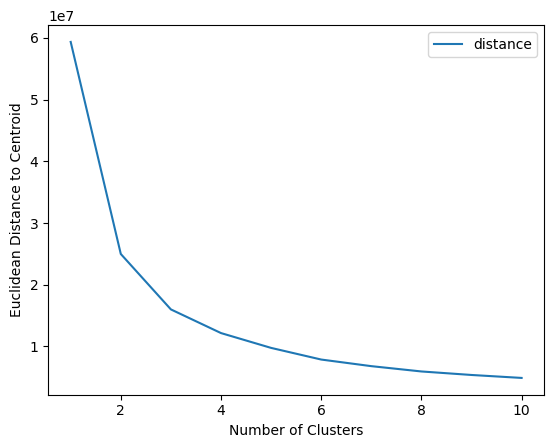

In [26]:
# implementing elbow method (sum of squares distance) to determine official optimal number of clusters 

Elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(audio_2)
    Elbow.append([i, kmeans.inertia_])
Elbow = pd.DataFrame(Elbow, columns=['number_of_clusters', 'distance'])
Elbow.set_index("number_of_clusters").plot()
plt.xlabel("Number of Clusters")
plt.ylabel("Euclidean Distance to Centroid")

Optimal Amount of Clusters: 3 

In [11]:
kmeans = KMeans(3)
audio_2['Cluster'] = kmeans.fit_predict(audio_2)


/Users/nasehacho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
info = audio_df[['genre', 'artist_name','track_name']]

info = pd.concat([info, audio_2], axis=1)

In [13]:
audio_2

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,Cluster
0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,1.000000,2
1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,1.000000,1
2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1.000000,1
3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,1.000000,1
4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,0.014286,2
28368,2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,0.014286,2
28369,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,0.014286,2
28370,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,0.014286,2


In [47]:
info[audio_2['Cluster'] == 2]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,1.000000,2
5,pop,perry como,round and round (with mitchell ayres and his o...,1950,98,0.001053,0.420685,0.001053,0.074078,0.001053,...,0.128292,0.001053,0.689158,0.685588,0.898594,0.000000,0.768137,0.549535,1.000000,2
10,pop,liva weel,"drømmer man om den, vågner..",1951,113,0.017090,0.026486,0.000774,0.000774,0.000774,...,0.000774,0.000774,0.625257,0.533113,0.972892,0.017004,0.691880,0.340320,0.985714,2
20,pop,mohammed rafi,jahan men log sachhe ashikon ko,1952,84,0.000693,0.392821,0.000693,0.000693,0.043832,...,0.435351,0.000693,0.540778,0.661513,0.986948,0.000000,0.598104,0.252229,0.971429,2
21,pop,ghantasala,avanee nee pathi,1952,104,0.000627,0.336365,0.110288,0.050451,0.000627,...,0.059252,0.037603,0.363154,0.471733,0.966867,0.235830,0.420857,0.343323,0.971429,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,hip hop,mack 10,10 million ways,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,0.014286,2
28368,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,0.014286,2
28369,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,0.014286,2
28370,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,0.014286,2


In [48]:
info[audio_2['Cluster'] == 1]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,Cluster
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,1.000000,1
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1.000000,1
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,1.000000,1
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,1.000000,1
7,pop,johnny mathis,it's not for me to say,1950,21,0.002506,0.002506,0.336056,0.002506,0.002506,...,0.062602,0.002506,0.379400,0.529421,0.925703,0.000072,0.373454,0.192167,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,hip hop,kurtis blow,basketball,2019,37,0.003096,0.003096,0.003096,0.003096,0.003096,...,0.003096,0.003096,0.883028,0.702766,0.077509,0.000959,0.891797,0.706698,0.014286,1
28353,hip hop,cassidy,a.m. to p.m.,2019,52,0.001754,0.080629,0.001754,0.001754,0.001754,...,0.001754,0.001754,0.558107,0.747455,0.011144,0.000000,0.653751,0.731723,0.014286,1
28354,hip hop,eric b. & rakim,paid in full,2019,34,0.002392,0.002392,0.002392,0.002392,0.002392,...,0.002392,0.002392,0.896025,0.681589,0.000432,0.001579,0.342539,0.750743,0.014286,1
28356,hip hop,$uicideboy$,you're now tuning into 66.6 fm with dj rapture...,2019,43,0.002024,0.002024,0.002024,0.002024,0.002024,...,0.002024,0.002024,0.667497,0.832013,0.125501,0.000000,0.268343,0.770764,0.014286,1


In [49]:
info[audio_2['Cluster'] == 0]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,Cluster
6,pop,freestyle,opm medley: when i met you,1950,179,0.000483,0.000483,0.371817,0.040712,0.000483,...,0.000483,0.123150,0.368569,0.633695,0.435742,0.000000,0.282770,0.486470,1.000000,0
12,pop,frankie laine,necessary evil,1951,173,0.000627,0.244358,0.083570,0.000627,0.013375,...,0.000627,0.032581,0.522365,0.528729,0.852409,0.000000,0.408491,0.153127,0.985714,0
15,pop,les paul,chicken reel,1951,199,0.000349,0.018417,0.391879,0.000349,0.025737,...,0.034922,0.026084,0.636088,0.640335,0.483935,0.791498,0.745466,0.521507,0.985714,0
17,pop,les paul,dark eyes,1951,182,0.000358,0.378119,0.030934,0.000358,0.025127,...,0.066822,0.043335,0.602513,0.577238,0.992972,0.874494,0.609439,0.291269,0.985714,0
19,pop,asha bhosle,awaz deta hai sola ka din,1952,148,0.000431,0.031304,0.000431,0.000431,0.016906,...,0.000431,0.426457,0.499621,0.673743,0.996988,0.000579,0.703215,0.240217,0.971429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28339,hip hop,fabolous,bad bitch,2019,162,0.000548,0.076798,0.000548,0.000548,0.026898,...,0.000548,0.000548,0.847287,0.716201,0.038955,0.000000,0.947444,0.476460,0.014286,0
28340,hip hop,jaydayoungan,hop out,2019,137,0.027956,0.000521,0.000521,0.000521,0.013074,...,0.076696,0.031645,0.769306,0.728482,0.187750,0.000000,0.703215,0.669659,0.014286,0
28343,hip hop,dj muggs,puppet master (feat. b real & dr. dre),2019,166,0.000849,0.234555,0.000849,0.052579,0.000849,...,0.000849,0.000849,0.581934,0.615107,0.039658,0.000688,0.417766,0.491476,0.014286,0
28348,hip hop,will smith,men in black,2019,182,0.127080,0.434874,0.174615,0.000537,0.000537,...,0.000537,0.016203,0.807213,0.728636,0.057830,0.000049,0.672300,0.662652,0.014286,0


In [14]:
audio_2.to_csv('train.csv', index=False)